In [80]:
filepath_n='Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages/wholescreendemo_toLVL4_data_16012024/MyExpt_FilteredNuclei_new.csv'
filepath_c='Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages/wholescreendemo_toLVL4_data_16012024/MyExpt_CellBody_new.csv'
filepath_i='Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages/wholescreendemo_toLVL4_data_16012024/MyExpt_Image.csv'
filepath_t='Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages/wholescreendemo_toLVL4_data_16012024/MyExpt_Nephrin.csv'
filepath_nt='Z:/1 BIS/Shared folders/Nikita/Marta/SCREEN/analysis/chip10/SegmentatedImages/wholescreendemo_toLVL4_data_16012024/MyExpt_FilteredNuclei_target.csv'
#importing datapath for tables

In [81]:
import os
import pandas as pd
import numpy as np
table_n=pd.read_csv(filepath_n)
table_c=pd.read_csv(filepath_c)
table_i=pd.read_csv(filepath_i)
table_t=pd.read_csv(filepath_t)
table_nt=pd.read_csv(filepath_nt)
#reading datatables

In [82]:
import statistics
median_area_cellbody=statistics.median(table_t['AreaShape_Area'])
print(median_area_cellbody)
#checking a median for the dataset of the target Area

3483.0


In [83]:
x = np.quantile(table_t['AreaShape_Area'], [0,0.25,0.5,0.75,1])

print(x)
#calculating q0-q4 quartiles for the target Area

[  177.  2288.  3483.  5170. 85987.]


In [84]:
q3toq1=x[3]-x[1]
q3toq1

#calculating interquartile range for the target Area

2882.0

In [85]:
lowerbound=x[1]-1.5*q3toq1
upperbound=x[3]+1.5*q3toq1
print(lowerbound,upperbound)
#calculating lower and upper bound for the target Area; I expect to get a negative lower bound, meaning only upper will be used for further outlier detection

-2035.0 9493.0


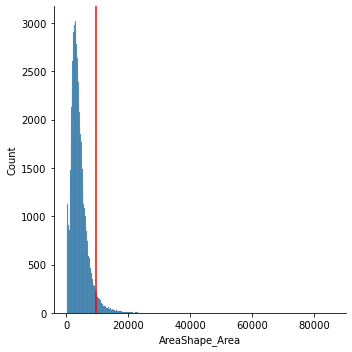

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(table_t['AreaShape_Area'])
#plt.plot([upperbound, upperbound], [0, 3700], 'k-', lw=2)
plt.axvline(upperbound, color='r') # vertical
plt.show()


In [87]:
#counting how many target objects exceed upperbound: 
t_exc = table_t['AreaShape_Area'].ge(upperbound)
result_t_exc = (t_exc.shift().ne(t_exc) & t_exc).sum()
print(result_t_exc)



4246


In [88]:

#percentage of upperbound outliers to the total number of objects 
outliers_count= result_t_exc/len(table_t['AreaShape_Area'])*100
print(outliers_count)



3.6141706814660965


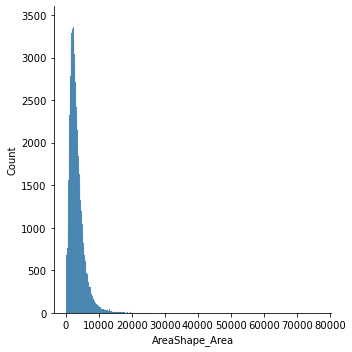

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(table_c['AreaShape_Area'])

plt.show()

In [91]:
#now filter based on the target IQR , sort other tables (nuclei and cell body) and merge

filtered_target=table_t.query('AreaShape_Area <9493 ')

In [92]:
table_nt['AreaShape_Area']

0          548
1          949
2          789
3         1438
4         1027
          ... 
117477     675
117478     265
117479     385
117480     635
117481     222
Name: AreaShape_Area, Length: 117482, dtype: int64

In [93]:
table_t['AreaShape_Area']

0         2157
1         2852
2         4651
3         8006
4         5592
          ... 
117477     802
117478     628
117479    2556
117480     635
117481     559
Name: AreaShape_Area, Length: 117482, dtype: int64

In [105]:
n_to_tarea= table_nt['AreaShape_Area']/table_t['AreaShape_Area']
n_to_tarea=pd.DataFrame(n_to_tarea)
n_to_tarea.rename(columns = {'AreaShape_Area':'NucleiToNephrin_Area'}, 
            inplace = True)
print(n_to_tarea)

        NucleiToNephrin_Area
0                   0.254057
1                   0.332749
2                   0.169641
3                   0.179615
4                   0.183655
...                      ...
117477              0.841646
117478              0.421975
117479              0.150626
117480              1.000000
117481              0.397138

[117482 rows x 1 columns]


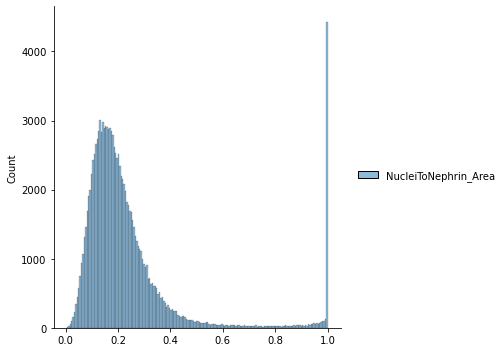

In [106]:
sns.displot(n_to_tarea)

plt.show()

[0.00370201 0.12976531 0.18508711 0.26282364 1.        ]
-0.06982219962049097 0.46241115074444894


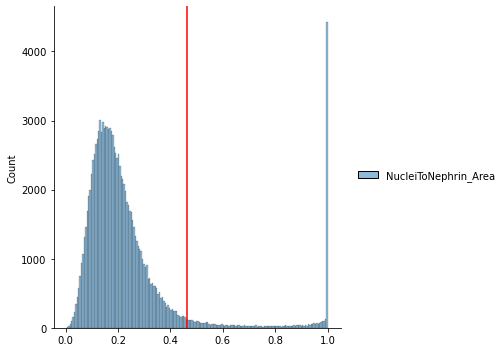

In [108]:
nkx = np.quantile(n_to_tarea, [0,0.25,0.5,0.75,1])

print(nkx)
#calculating q0-q4 quartiles for the target Area

nkq3toq1=nkx[3]-nkx[1]
nkq3toq1

#calculating interquartile range for the target Area

nklowerbound=nkx[1]-1.5*nkq3toq1
nkupperbound=nkx[3]+1.5*nkq3toq1
print(nklowerbound,nkupperbound)
#calculating lower and upper bound for the target Area; I expect to get a negative lower bound, meaning only upper will be used for further outlier detection


sns.displot(n_to_tarea)
#plt.plot([upperbound, upperbound], [0, 3700], 'k-', lw=2)
plt.axvline(nkupperbound, color='r') # vertical
plt.show()

In [116]:
#counting how many nuclei to nephrin values equal to 1: 
n_to_tarea_count = n_to_tarea.eq(1).sum(axis=0)
print(n_to_tarea_count)


NucleiToNephrin_Area    4255
dtype: int64


In [117]:
table_t.loc[:, "NucleiToNephrin_Area"] = n_to_tarea

In [125]:
table_t

,ImageNumber,ObjectNumber,Metadata_FileLocation,Metadata_Frame,Metadata_Plate,Metadata_Series,Metadata_Well,Metadata_channel,Metadata_col,Metadata_row,...,Texture_Variance_CorrCellBody_3_03_256,Texture_Variance_CorrDNA_3_00_256,Texture_Variance_CorrDNA_3_01_256,Texture_Variance_CorrDNA_3_02_256,Texture_Variance_CorrDNA_3_03_256,Texture_Variance_CorrTarget_3_00_256,Texture_Variance_CorrTarget_3_01_256,Texture_Variance_CorrTarget_3_02_256,Texture_Variance_CorrTarget_3_03_256,NucleiToNephrin_Area
0,1,1,NaN,0,1,0,D01,NaN,1,4,...,0.061888,4.310976,4.390063,4.325983,4.423765,0.418328,0.399205,0.393920,0.397482,0.254057
1,1,2,NaN,0,1,0,D01,NaN,1,4,...,0.463550,10.361830,10.761082,10.476729,10.414115,2.158486,2.084201,2.052380,2.049114,0.332749
2,1,3,NaN,0,1,0,D01,NaN,1,4,...,0.439169,2.118559,2.140939,2.140559,2.205244,0.974629,0.944953,0.947933,0.958198,0.169641
3,1,4,NaN,0,1,0,D01,NaN,1,4,...,0.854987,3.186764,3.227584,3.196456,3.239772,2.390485,2.325635,2.333576,2.329661,0.179615
4,1,5,NaN,0,1,0,D01,NaN,1,4,...,0.359751,8.773041,9.140939,8.817751,8.787023,1.526785,1.524244,1.518019,1.510100,0.183655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117477,4114,45,NaN,0,10,0,6666,NaN,66,66,...,0.082761,0.715107,0.648200,0.684200,0.686950,0.053362,0.036982,0.046024,0.046297,0.841646
117478,4114,46,NaN,0,10,0,6666,NaN,66,66,...,0.182107,1.413356,1.366979,1.397506,1.402614,2.382048,2.388485,2.386475,2.578538,0.421975
117479,4114,47,NaN,0,10,0,6666,NaN,66,66,...,0.666859,1.942058,2.008858,1.976715,2.035742,1.277124,1.200605,1.275585,1.315687,0.150626
117480,4114,48,NaN,0,10,0,6666,NaN,66,66,...,0.083836,1.223550,1.259166,1.203468,1.252259,0.000000,0.000000,0.000000,0.000000,1.000000


In [126]:
filtered_ranked_Nephrin=table_t.sort_values(by=['NucleiToNephrin_Area','ImageNumber'])
filtered_ranked_Nephrin

,ImageNumber,ObjectNumber,Metadata_FileLocation,Metadata_Frame,Metadata_Plate,Metadata_Series,Metadata_Well,Metadata_channel,Metadata_col,Metadata_row,...,Texture_Variance_CorrCellBody_3_03_256,Texture_Variance_CorrDNA_3_00_256,Texture_Variance_CorrDNA_3_01_256,Texture_Variance_CorrDNA_3_02_256,Texture_Variance_CorrDNA_3_03_256,Texture_Variance_CorrTarget_3_00_256,Texture_Variance_CorrTarget_3_01_256,Texture_Variance_CorrTarget_3_02_256,Texture_Variance_CorrTarget_3_03_256,NucleiToNephrin_Area
98961,3458,3,NaN,0,7,0,O51,NaN,51,15,...,0.000000,0.240721,0.240787,0.240286,0.240974,0.150205,0.151258,0.149898,0.150739,0.003702
98962,3458,4,NaN,0,7,0,O51,NaN,51,15,...,0.000000,0.036808,0.037106,0.036902,0.037261,0.149578,0.151216,0.149311,0.150992,0.005758
99274,3491,1,NaN,0,7,0,E57,NaN,57,5,...,0.325195,0.093892,0.092050,0.093218,0.094214,0.605454,0.627505,0.607283,0.594137,0.006341
28505,831,9,NaN,0,2,0,6439,NaN,39,64,...,0.019580,0.070938,0.047651,0.062092,0.070375,5.641175,5.701678,5.640055,5.666505,0.006665
98611,3417,2,NaN,0,7,0,D43,NaN,43,4,...,0.475309,0.081952,0.082499,0.081828,0.082962,0.449275,0.452542,0.448902,0.454538,0.007261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117373,4111,25,NaN,0,10,0,3566,NaN,66,35,...,0.324869,2.310636,2.439721,2.279053,2.386296,0.000000,0.000000,0.000000,0.000000,1.000000
117428,4113,21,NaN,0,10,0,6466,NaN,66,64,...,0.198115,2.929209,2.973675,2.967853,2.968883,0.032391,0.033099,0.038541,0.037419,1.000000
117473,4114,41,NaN,0,10,0,6666,NaN,66,66,...,0.201161,0.151132,0.147081,0.135172,0.138274,0.000000,0.000000,0.000000,0.000000,1.000000
117474,4114,42,NaN,0,10,0,6666,NaN,66,66,...,0.238400,0.237461,0.240930,0.242778,0.239668,0.000000,0.000000,0.000000,0.000000,1.000000


In [127]:
filtered_ranked_Nephrin.to_csv('filtered_ranked_Nephrin.csv')